### Part 1:  Pose Graph Optimization for 1D SLAM

A solved example for 1D SLAM which optimizes for pose variables using weighted least squares method (Gauss Newton) has been explained in the class. You can view it at `examples/1D-SLAM.ipynb`. Your first task is to code this from scratch.

For this section, you have to calculate Jacobian analytically yourself and use it. However, you can check how correct it is using `jax`'s `jacobian`. Its usage is explained in the supplementary notebook (`examples/`).

### How to get started?

1. Go through the example and understand the optimization procedure.
2. Generate the data as in the example.
3. Write the derivatives of the function with respect to the constraints
4. Create the final jacobian and write the update steps using Gauss Newton

This tiny example will help make sense of the next question, as it's largely just an extension of this.

Finally, plot the loop closure constraint, poses, and error at every iteration as well. Since this is a one dimensional example, you can just assume x = y.

In [ ]:
!pip3 install jax jaxlib

In [1]:
import math
import jax.numpy as jnp
import matplotlib.pyplot as plt

from jax import jacfwd

In [2]:
def f_x(x):
    return jnp.array([
        x[0] + 1.1 - x[1],
        x[1] + 1.0 - x[2],
        x[2] + 1.1 - x[3],
        x[3] - 2.7 - x[4],
        x[0] + 0.0 - x[4],
        x[0] - 0
    ])

ground_odom = jnp.array([1.0, 1.0, 1.0, -3.0, 0.0])
obs_odom    = jnp.array([1.1, 1.0, 1.1, -2.7, 0.0])

ground_x    = jnp.array([0.0, 1.0, 2.0, 3.0, 0.0])
obs_x       = jnp.array([0.0, 1.1, 2.1, 3.2, 0.5])

omega = jnp.eye(6) * 100
omega = omega.at[-1, -1].set(1000)

J = jnp.array([
    [1, -1, 0, 0, 0],
    [0, 1, -1, 0, 0],
    [0, 0, 1, -1, 0],
    [0, 0, 0, 1, -1],
    [1, 0, 0, 0, -1],
    [1, 0, 0, 0, 0 ]
])

f = lambda x: f_x(x)
J_jax = jacfwd(f)
print(f"Frobenius norm between Our jacobian and Jax jacobian is {jnp.linalg.norm(J - J_jax(obs_x), 'fro')}")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Frobenius norm between Our jacobian and Jax jacobian is 0.0


In [3]:
def draw(H, ground_X, obs_X):
    plt.plot(ground_X, ground_X, 'bo', label="Ground Truth poses")    
    plt.plot(obs_X, obs_X, 'ro', label="Estimated poses")

    m, n = H.shape

    for i in range(m):
        for j in range(n):
            if i <= j and H[i][j] != 0:
                plt.plot([obs_X[i], obs_X[j]], [obs_X[i], obs_X[j]], 'g:')

    plt.legend()
    plt.show()

Initial error --- 0.5567764639854431


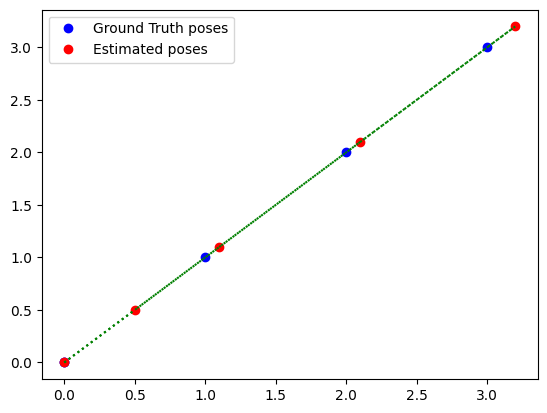


Error after Iteration 1 --- 0.17320513725280762


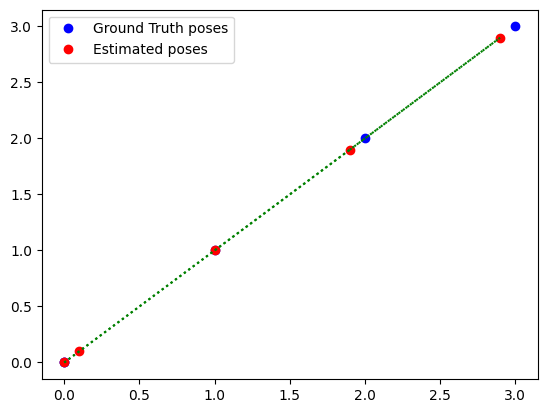

Error after Iteration 2 --- 0.17320501804351807


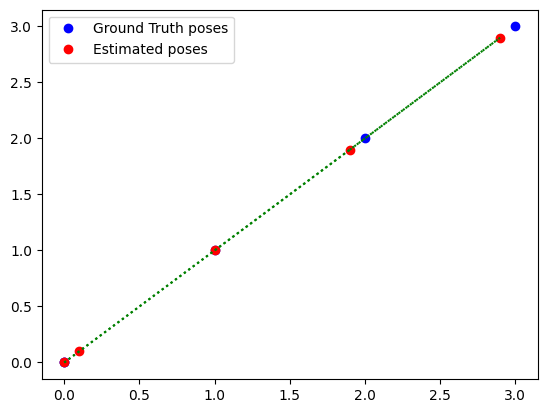

Error after Iteration 3 --- 0.17320503294467926


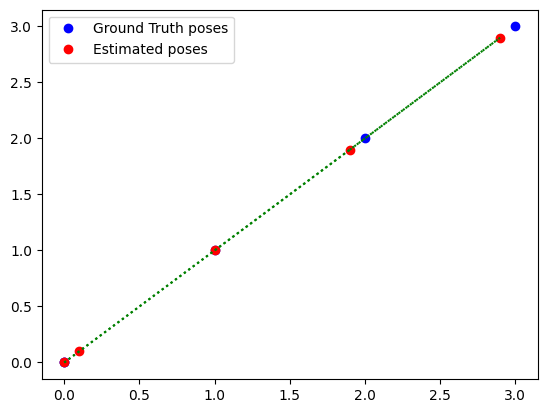

Error after Iteration 4 --- 0.17320504784584045


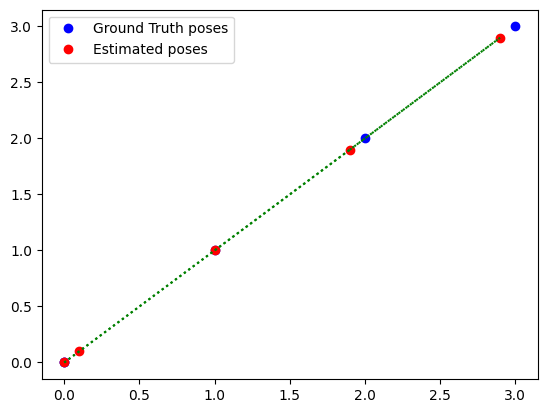

Error after Iteration 5 --- 0.17320504784584045


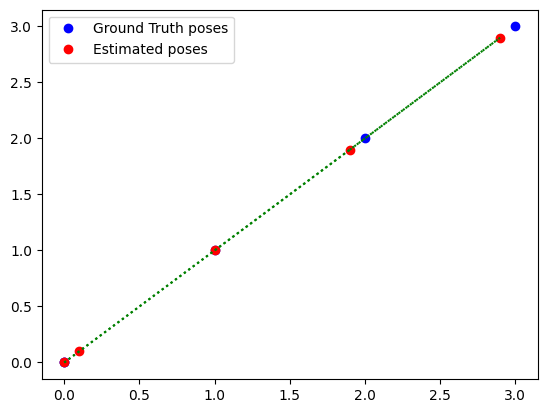

Error after Iteration 6 --- 0.17320504784584045


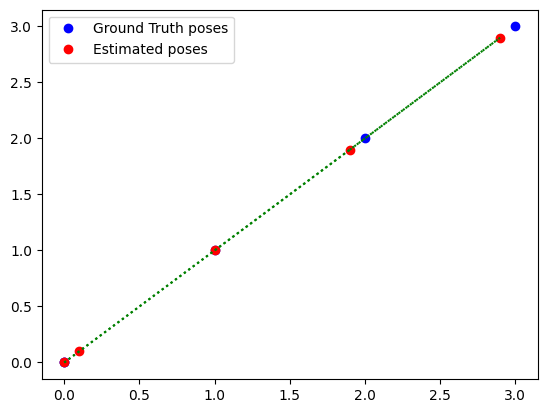

Error after Iteration 7 --- 0.17320504784584045


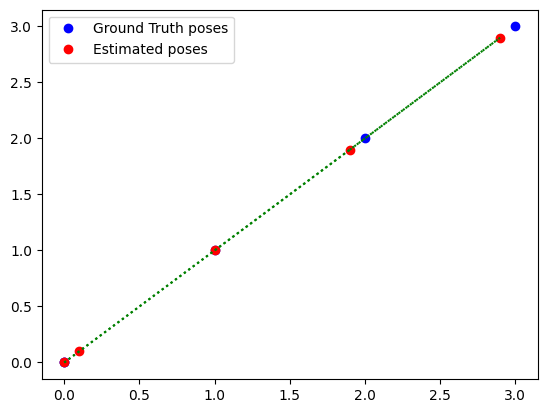

Error after Iteration 8 --- 0.17320504784584045


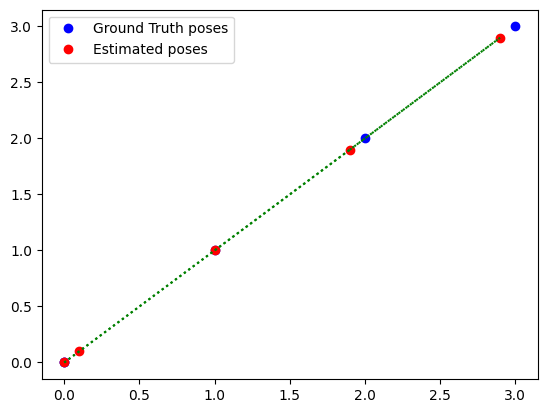

Error after Iteration 9 --- 0.17320504784584045


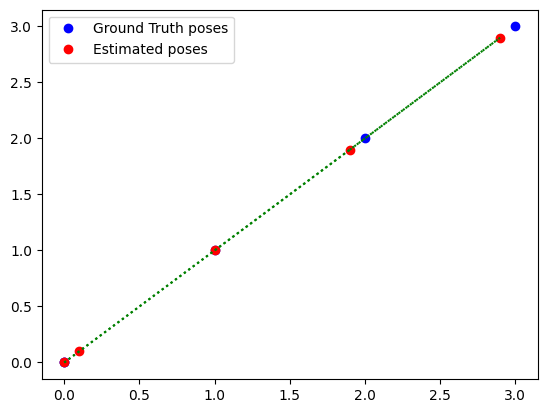

Error after Iteration 10 --- 0.17320504784584045


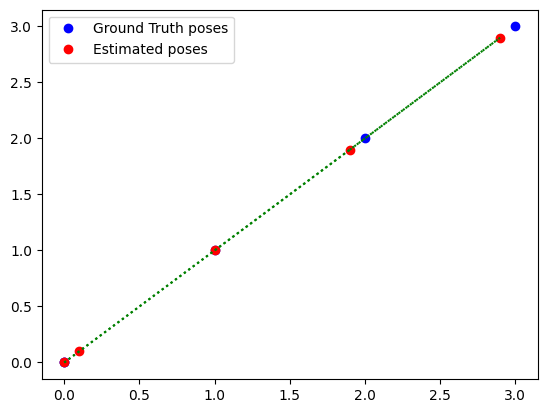


Updated observations --- [-3.278278e-10  1.000000e+00  1.900000e+00  2.900000e+00  1.000000e-01]


In [4]:
H = J.T @ omega @ J

print(f"Initial error --- {jnp.linalg.norm(ground_x - obs_x)}")
draw(H, ground_x, obs_x)
print()

num_epochs = 10
for i in range(num_epochs):
    b = J.T @ omega.T @ f_x(obs_x)

    del_x = (-jnp.linalg.inv(H) @ b)
    obs_x += del_x

    print(f"Error after Iteration {i + 1} --- {jnp.linalg.norm(ground_x - obs_x)}")
    draw(H, ground_x, obs_x)

print()
print(f"Updated observations --- {obs_x}")